In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [3]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [4]:
bdd = pd.read_csv("/neurospin/dico/jchavas/Runs/61_classifier_regresser/Output/flanker/summary/bdd_2023-09-01_no_earlystopping.csv", index_col=0)
bdd = bdd.sort_values(by=['model_path'], ascending=False)

In [5]:
bdd_random = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-01_no_earlystopping_shuffled.csv", index_col=0)
bdd_random = bdd_random.sort_values(by=['model_path'], ascending=False)

In [6]:
bdd.iloc[0]['model_path']

'/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-01_no_earlystopping/2023-09-03/04-46-33_149'

In [7]:
bdd['test_auc_random'] = bdd_random['test_auc']
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,test_auc_random
59,/volatile2/jc225751/Runs/61_classifier_regress...,0.623229,0.470049,0.535931,0.569408,0.536170,0.535642,0.161673,0.966733,0.000819,0.160544,136.984207,0.571181
58,/volatile2/jc225751/Runs/61_classifier_regress...,0.599087,0.611784,0.544589,0.607049,0.613748,0.552092,0.165904,0.853976,0.000829,0.155085,137.913651,0.509549
57,/volatile2/jc225751/Runs/61_classifier_regress...,0.579556,0.547954,0.526696,0.582921,0.562029,0.533766,0.186145,0.817838,0.000938,0.067786,138.701965,0.540799
56,/volatile2/jc225751/Runs/61_classifier_regress...,0.584386,0.606219,0.529004,0.586444,0.629460,0.535065,0.187002,0.814002,0.000631,0.349725,138.580551,0.515046
55,/volatile2/jc225751/Runs/61_classifier_regress...,0.589306,0.635352,0.551227,0.582771,0.639607,0.560173,0.184576,0.900516,0.000792,0.388733,138.084366,0.502604


In [8]:
bdd_random.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss
59,/volatile2/jc225751/Runs/61_classifier_regress...,0.452636,0.573073,0.571181,0.435582,0.513911,0.542535,0.161673,0.966733,0.000819,0.160544,136.984207
58,/volatile2/jc225751/Runs/61_classifier_regress...,0.482968,0.582028,0.509549,0.465004,0.548769,0.521991,0.165904,0.853976,0.000829,0.155085,137.913651
57,/volatile2/jc225751/Runs/61_classifier_regress...,0.447129,0.513272,0.540799,0.447325,0.509754,0.528791,0.186145,0.817838,0.000938,0.067786,138.701965
56,/volatile2/jc225751/Runs/61_classifier_regress...,0.470420,0.543652,0.515046,0.491018,0.518388,0.503183,0.187002,0.814002,0.000631,0.349725,138.580551
55,/volatile2/jc225751/Runs/61_classifier_regress...,0.474497,0.542053,0.502604,0.480185,0.537896,0.501447,0.184576,0.900516,0.000792,0.388733,138.084366


AUC = 0.5524386724386725 +/- 0.00763400953419271
AUC-1 = 0.5525541125541126 +/- 0.00777240817305663
AUC-2 = 0.5524386724386725 +/- 0.00763400953419271
AUC (best model) = 0.5286291486291487 +/- 0.029125689257298294


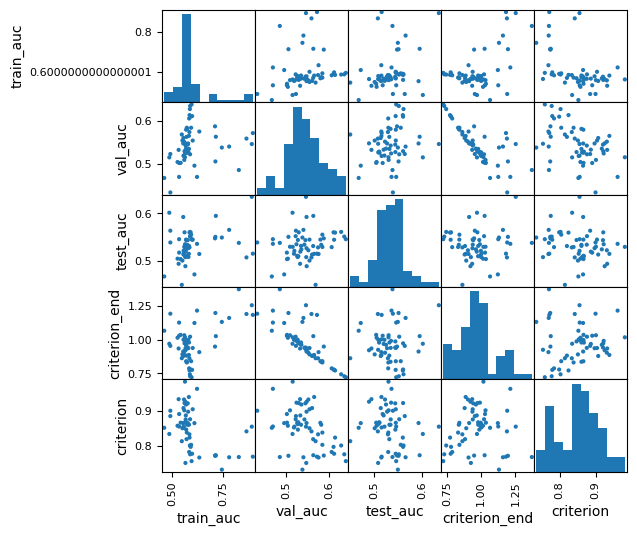

In [9]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end_old"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["criterion_end"] = bdd.apply(lambda x: 2*(1-x["val_auc"]) + max(-x["val_auc"] + x["train_auc"], 0), axis=1)

best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_end_old = bdd.sort_values(by=['criterion_end_old'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-1 = {best_end_old['test_auc'].mean()} +/- {best_end_old['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'criterion_end', 'criterion']],
                                 figsize=(6,6),
                                 alpha=1.0)

In [10]:
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")

AUC = 0.5524386724386725 +/- 0.00763400953419271
AUC-2 = 0.5524386724386725 +/- 0.00763400953419271
AUC (best model) = 0.5286291486291487 +/- 0.029125689257298294


(0.75, 1.2)

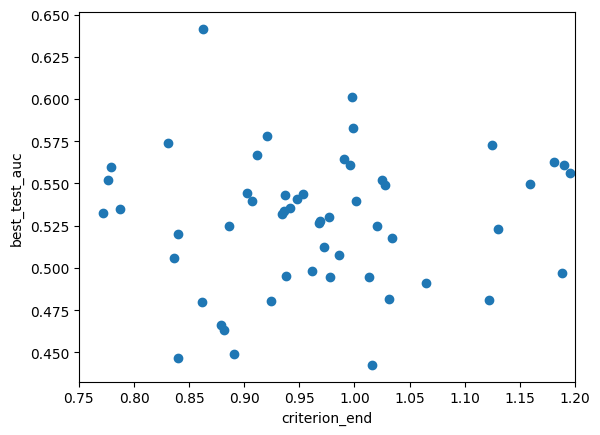

In [11]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")
plt.xlim((0.75,1.2))

(0.75, 1.1)

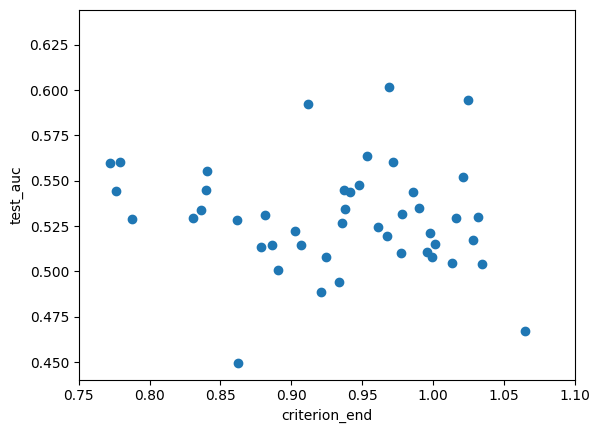

In [12]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,1.1))

Text(0, 0.5, 'val_auc')

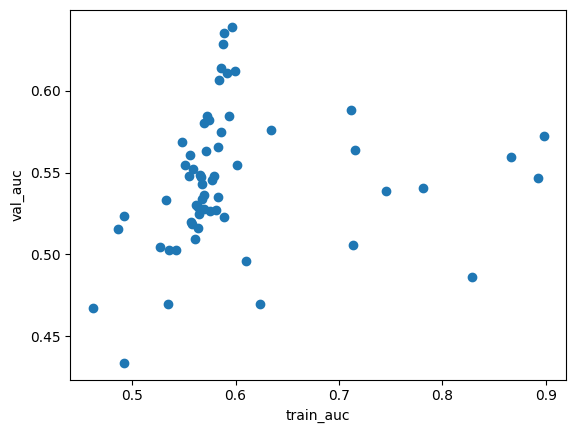

In [28]:
plt.scatter(bdd["train_auc"], bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

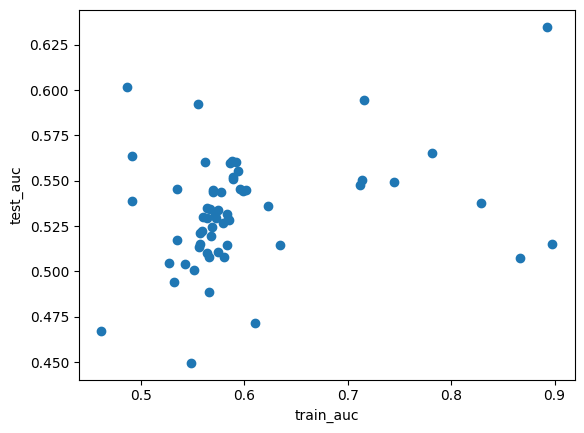

In [30]:
plt.scatter(bdd["train_auc"], bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'criterion')

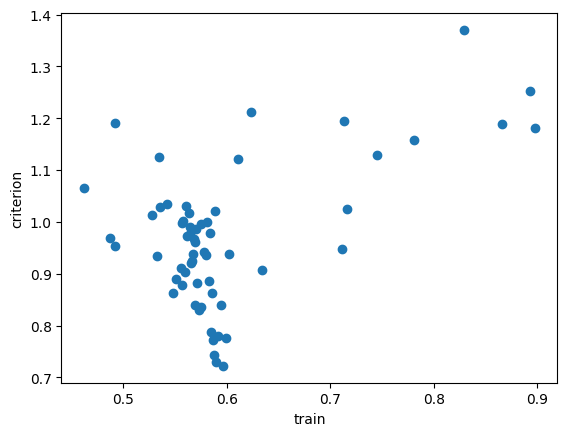

In [13]:
plt.scatter(bdd["train_auc"], bdd.criterion_end)
plt.xlabel("train")
plt.ylabel("criterion")

(0.75, 1.1)

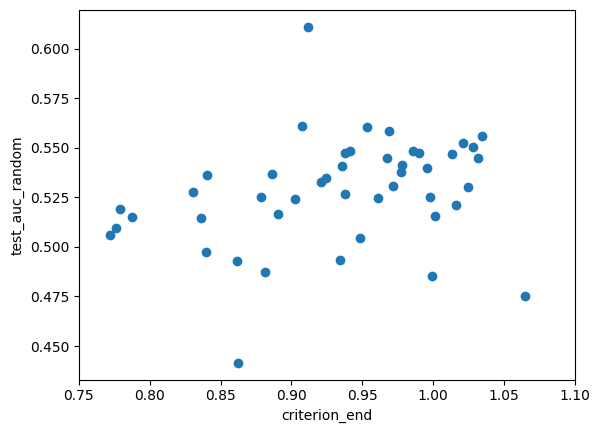

In [14]:
plt.scatter(bdd["criterion_end"], bdd.test_auc_random)
plt.xlabel("criterion_end")
plt.ylabel("test_auc_random")
plt.xlim((0.75,1.1))

In [15]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [16]:
quantile = []
test_auc_random = []
test_auc_random_cum = []
quantile_x = np.arange(delta,1+delta,delta)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_random_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc_random'].mean())
    if q==delta:
        test_auc_random.append(test_auc_random_cum[-1])
    else:
        test_auc_random.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc_random'].mean())

(0.45, 0.6)

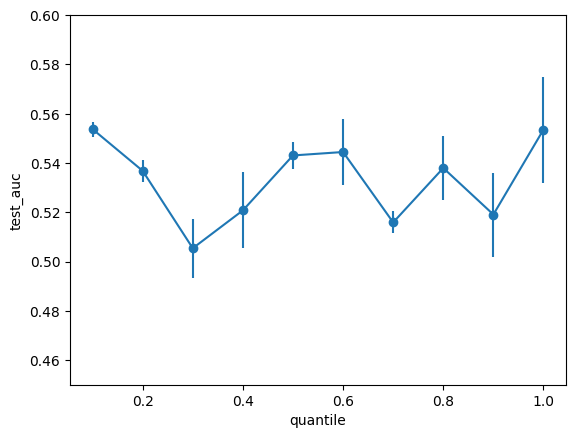

In [17]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.45,0.6))

(0.5, 0.6)

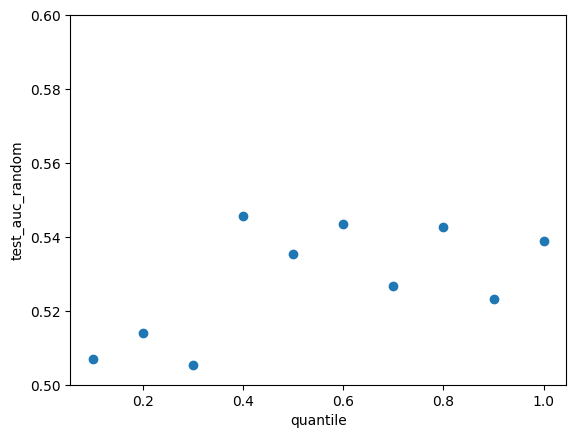

In [18]:
plt.scatter(quantile_x, test_auc_random)
plt.xlabel("quantile")
plt.ylabel("test_auc_random")
plt.ylim((0.5,0.6))

(0.45, 0.6)

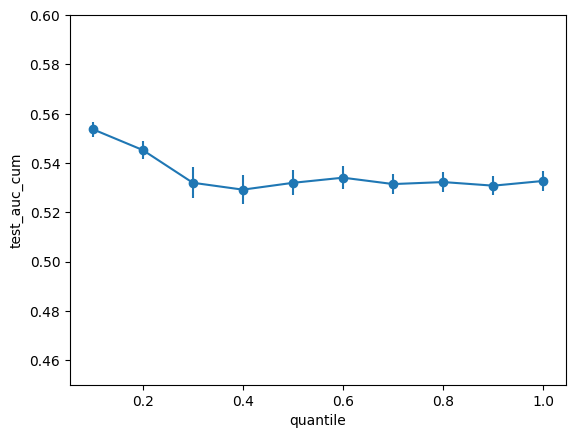

In [19]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

(0.5, 0.6)

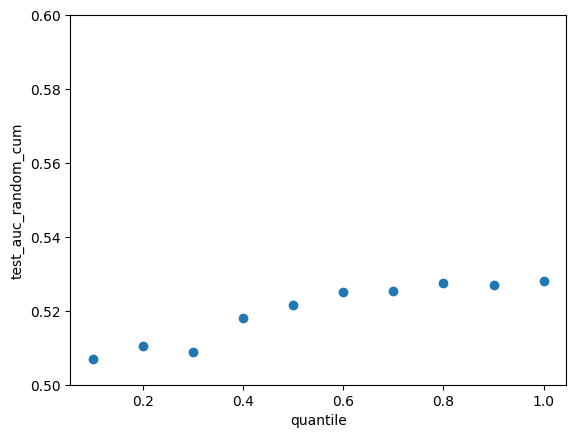

In [20]:
plt.scatter(quantile_x, test_auc_random_cum)
plt.xlabel("quantile")
plt.ylabel("test_auc_random_cum")
plt.ylim((0.5,0.6))

Text(0, 0.5, 'best_test_auc')

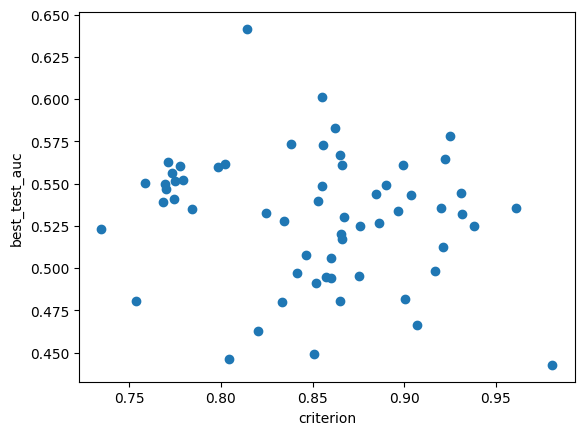

In [21]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [22]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

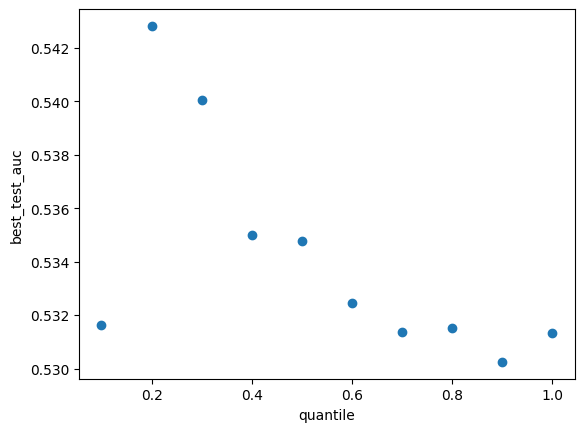

In [23]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

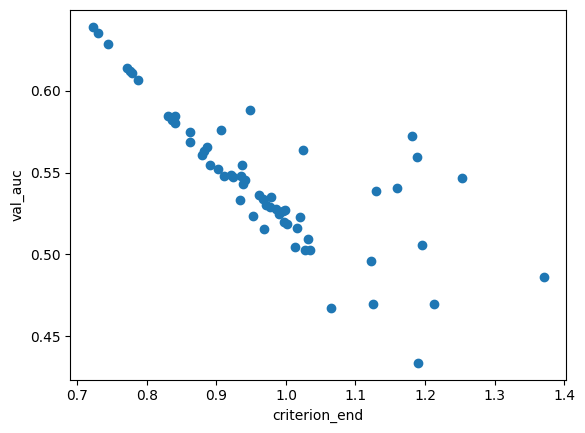

In [24]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

(0.45, 0.7)

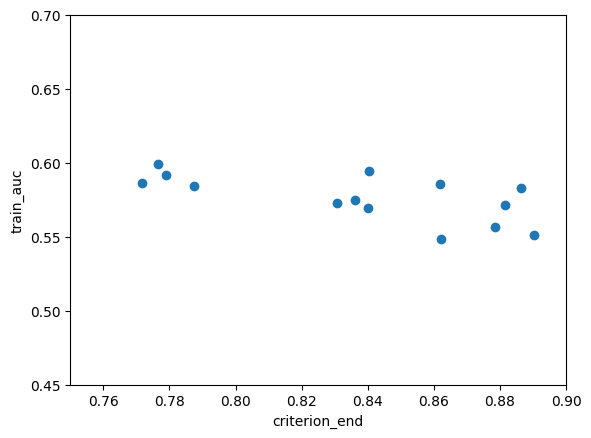

In [25]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")
plt.xlim((0.75,0.9))
plt.ylim((0.45,0.7))

In [26]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,test_auc_random,criterion,criterion_end_old,criterion_end
52,/volatile2/jc225751/Runs/61_classifier_regress...,0.892621,0.546645,0.634921,0.601010,0.581997,0.548629,0.199964,0.907358,0.000402,0.070018,122.142357,0.537326,0.855019,1.252686,1.252686
5,/volatile2/jc225751/Runs/61_classifier_regress...,0.486809,0.515548,0.601443,0.525405,0.640098,0.527706,0.164181,0.984609,0.000962,0.154731,138.605408,0.558304,0.834497,0.997642,0.968903
42,/volatile2/jc225751/Runs/61_classifier_regress...,0.715818,0.563666,0.594805,0.588705,0.636334,0.551804,0.177365,0.713885,0.000828,0.041859,133.885925,0.530382,0.774961,1.024820,1.024820
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.555406,0.547954,0.592496,0.562993,0.571849,0.567100,0.167347,0.947920,0.000543,0.242389,138.568359,0.611111,0.865158,0.911544,0.911544
54,/volatile2/jc225751/Runs/61_classifier_regress...,0.781275,0.540753,0.565368,0.604172,0.626514,0.549784,0.173081,0.755953,0.000627,0.144692,129.585144,0.542245,0.769314,1.159016,1.159016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,/volatile2/jc225751/Runs/61_classifier_regress...,0.532653,0.533061,0.493939,0.565945,0.544681,0.531746,0.172357,0.983010,0.000606,0.393535,138.631058,0.493634,0.931902,0.934286,0.933879
1,/volatile2/jc225751/Runs/61_classifier_regress...,0.565870,0.548282,0.488889,0.509194,0.565957,0.578066,0.182358,0.736130,0.000421,0.369545,138.832245,0.532697,0.924848,0.921025,0.921025
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.610504,0.496236,0.471573,0.549525,0.585597,0.480808,0.181677,0.757719,0.000495,0.144937,138.370605,0.523148,0.864878,1.121797,1.121797
2,/volatile2/jc225751/Runs/61_classifier_regress...,0.461983,0.467594,0.467244,0.563421,0.584779,0.491342,0.198529,0.995329,0.000516,0.101658,138.669815,0.475405,0.851800,1.070423,1.064812


In [27]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

KeyError: 'diff_criterion'

Text(0, 0.5, 'best_test_auc')

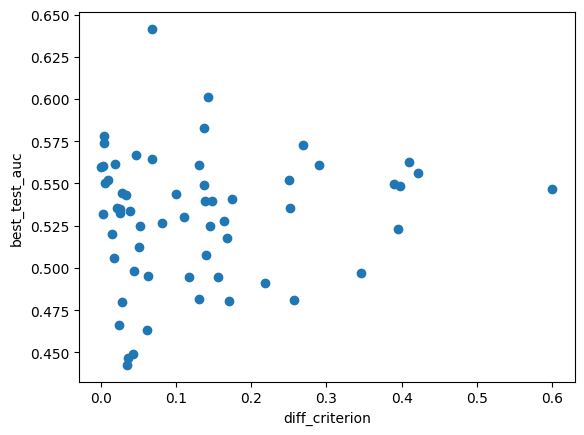

In [ ]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

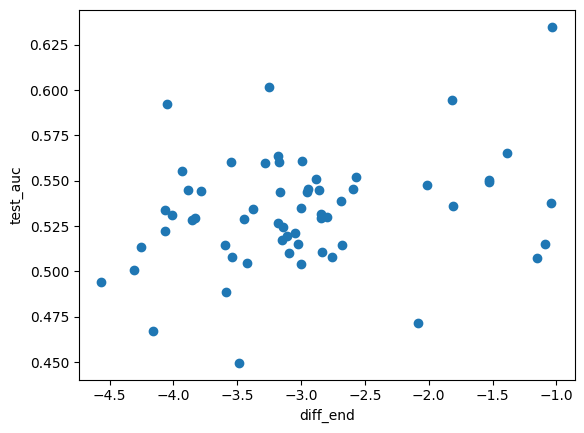

In [ ]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

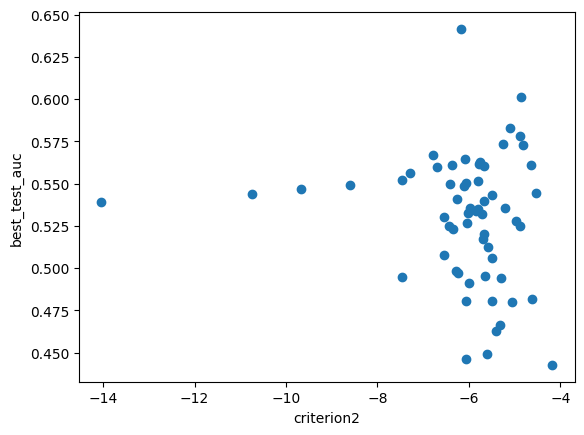

In [ ]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

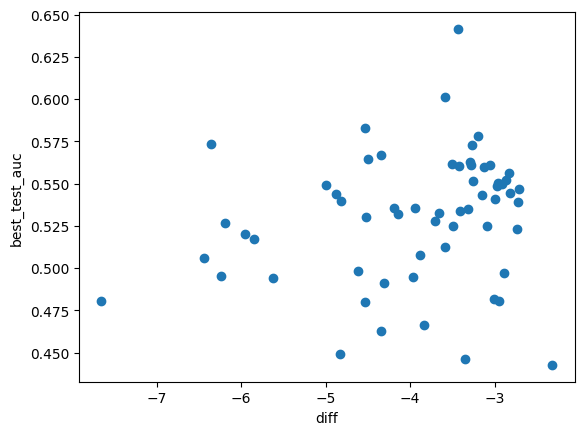

In [ ]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

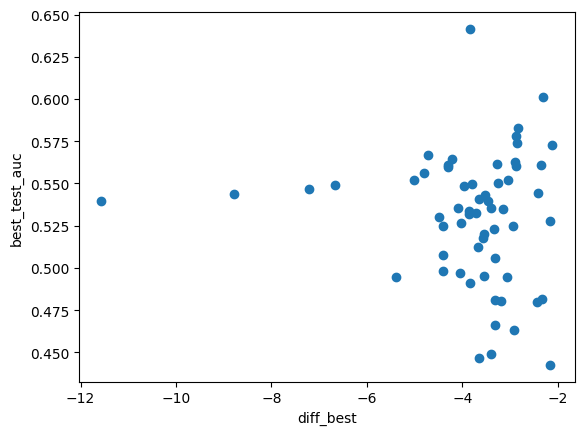

In [ ]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

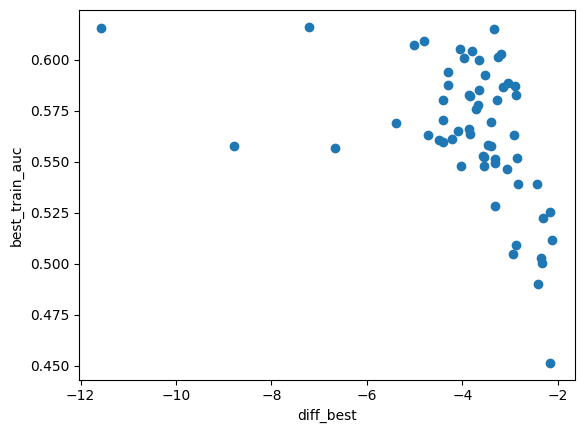

In [ ]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

(0.4, 0.65)

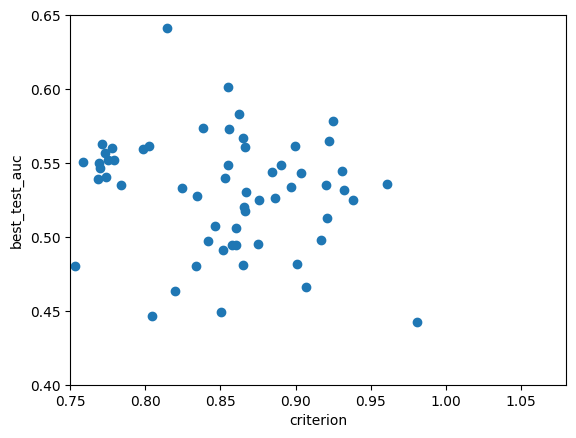

In [ ]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.ylim((0.35,0.65))
plt.xlim((0.75,1.08))
plt.ylim((0.4,0.65))

(0.5, 0.65)

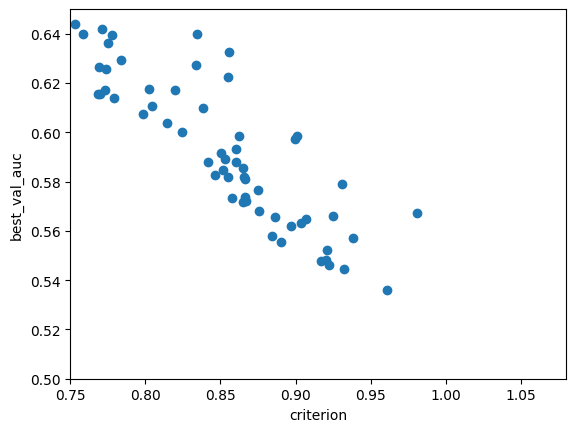

In [ ]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")
plt.xlim((0.75,1.08))
plt.ylim((0.5,0.65))

(0.75, 0.9)

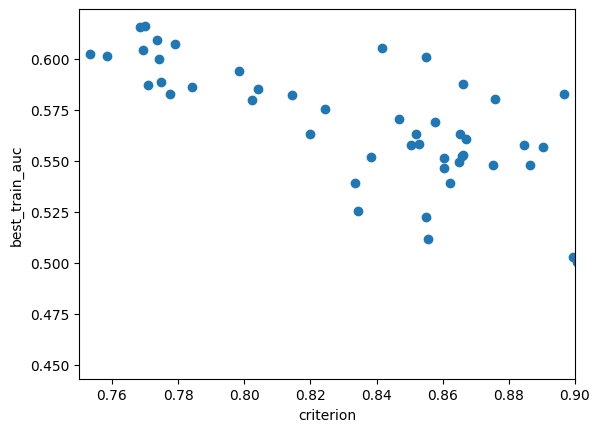

In [ ]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")
plt.xlim((0.75,0.9))

(0.75, 0.9)

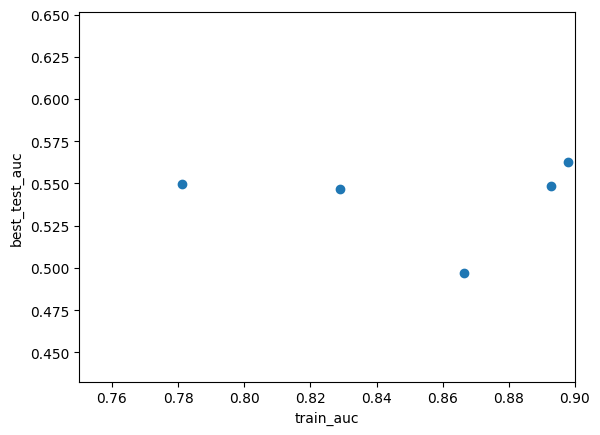

In [ ]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'test_auc')

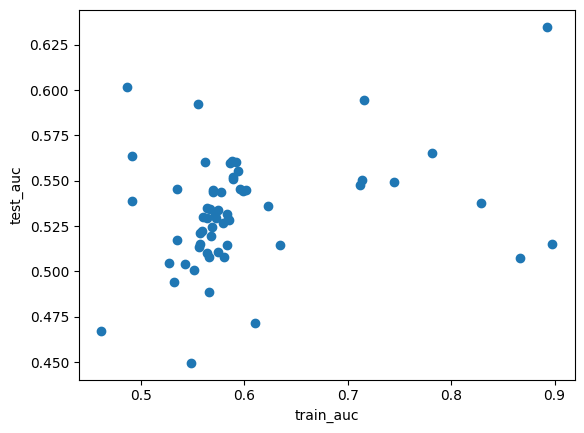

In [ ]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

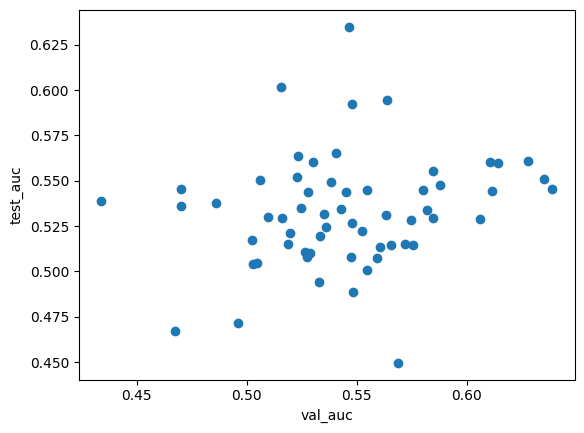

In [ ]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

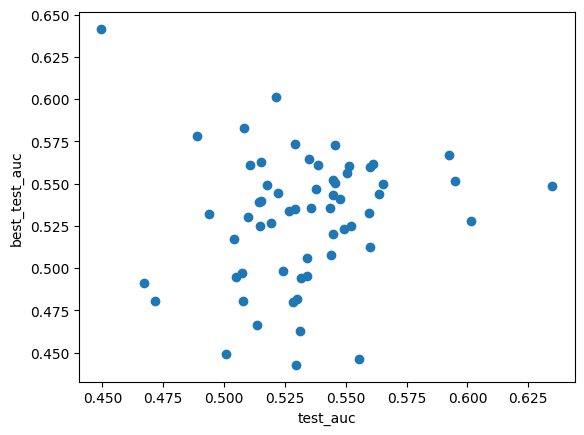

In [ ]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

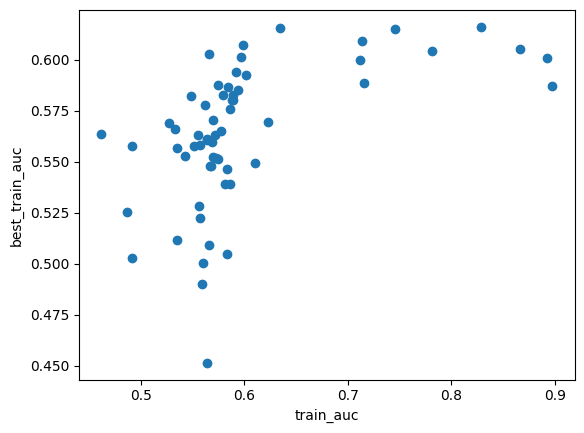

In [ ]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

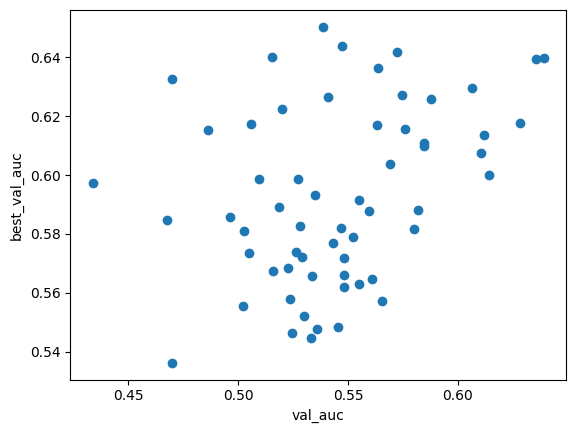

In [ ]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

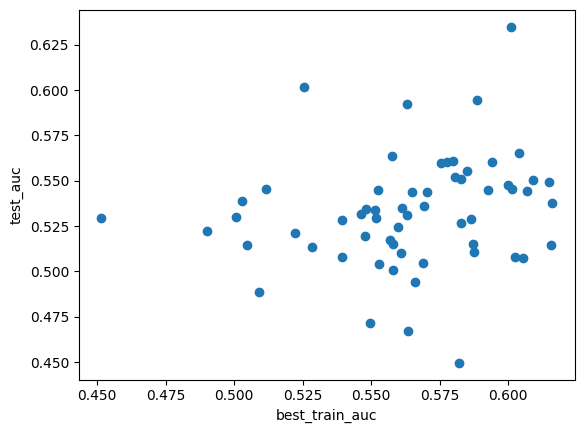

In [ ]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

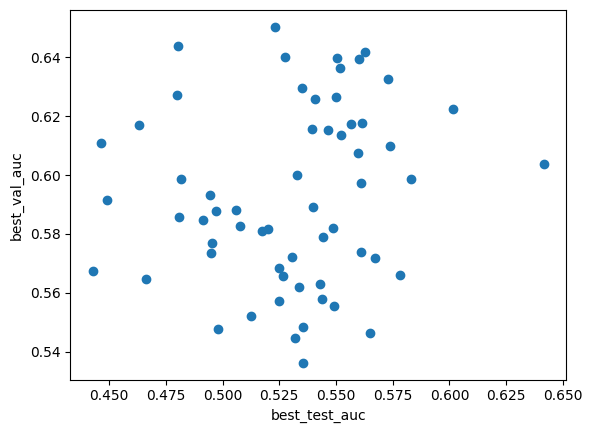

In [ ]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

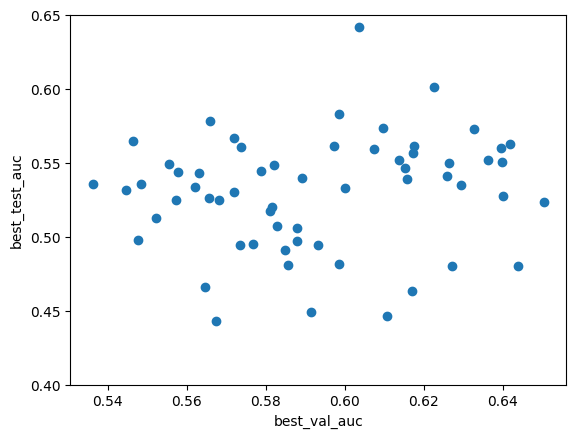

In [ ]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

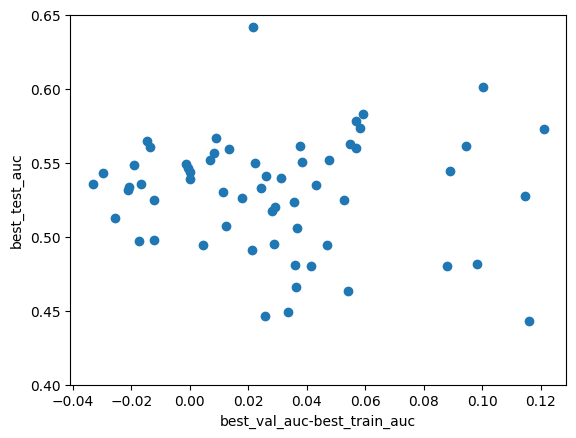

In [ ]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

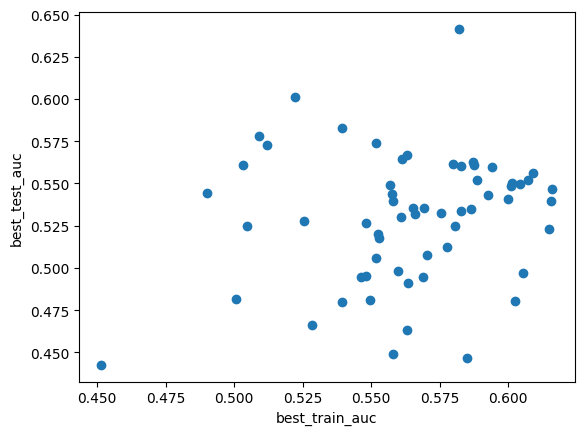

In [ ]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

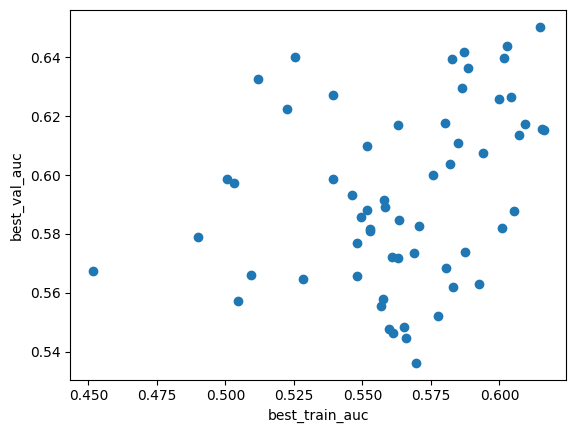

In [ ]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

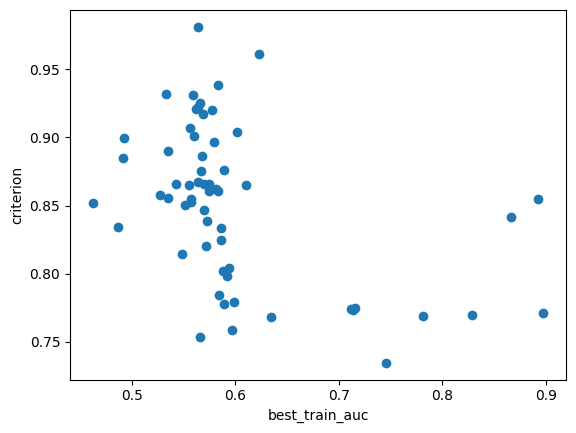

In [ ]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

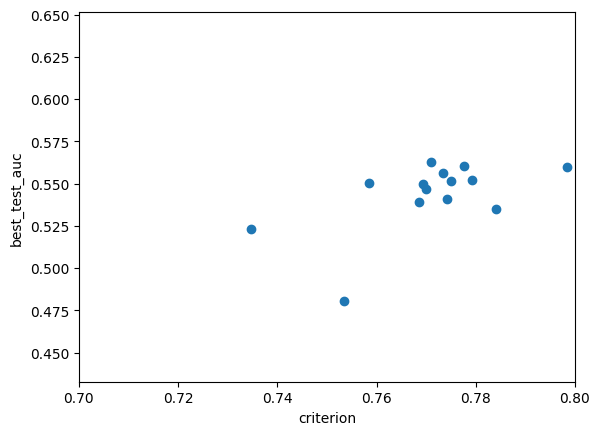

In [ ]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

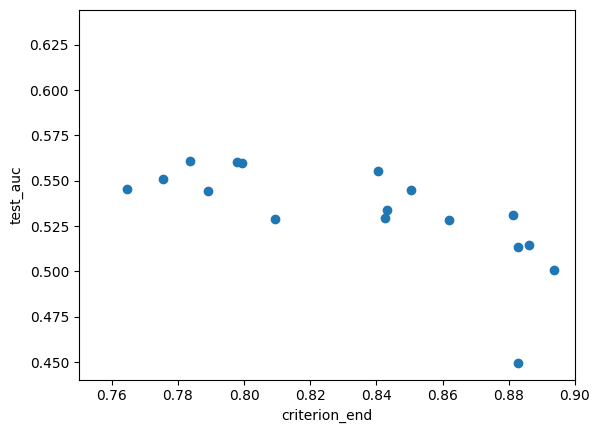

In [ ]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

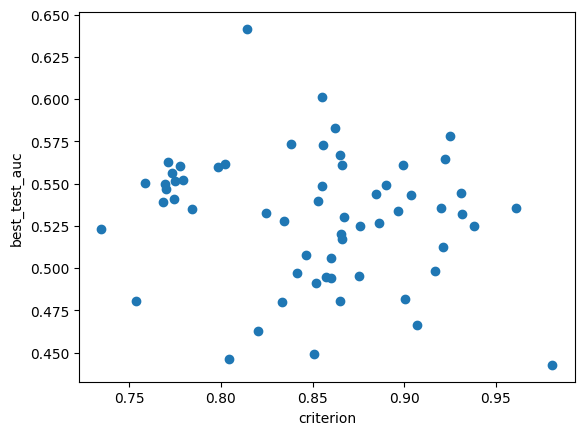

In [ ]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

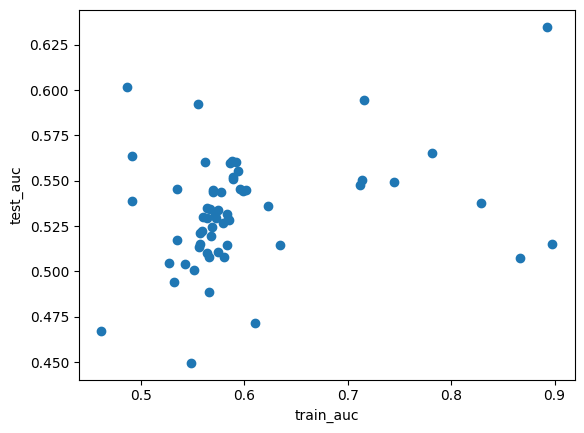

In [ ]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

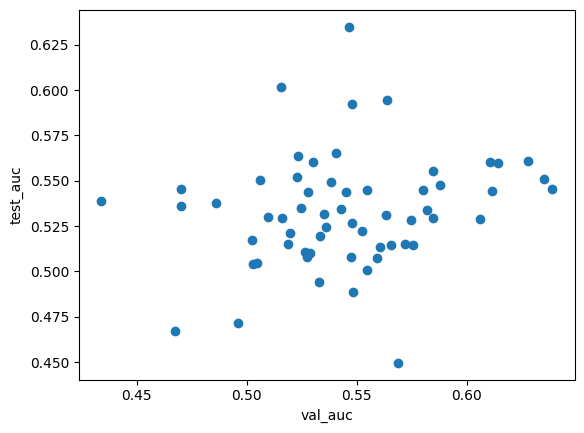

In [ ]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

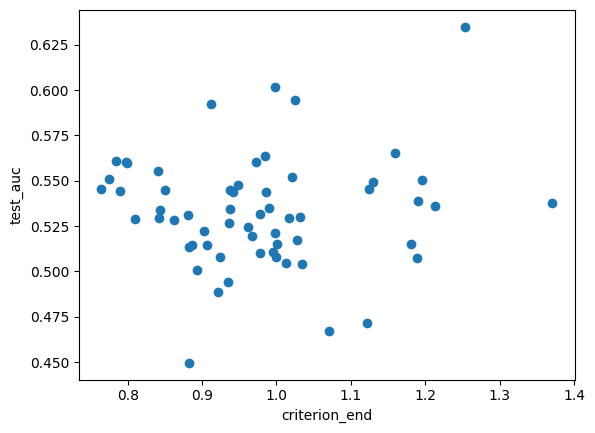

In [ ]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

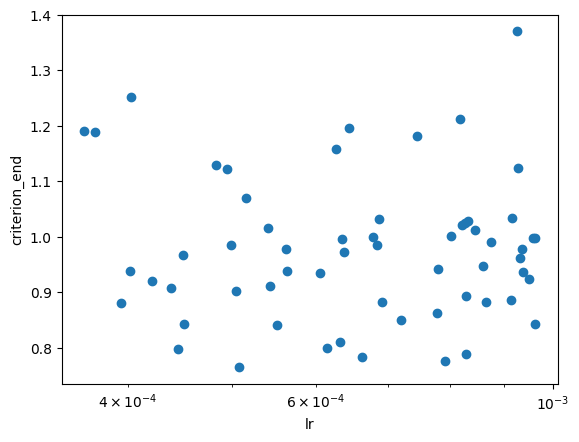

In [ ]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

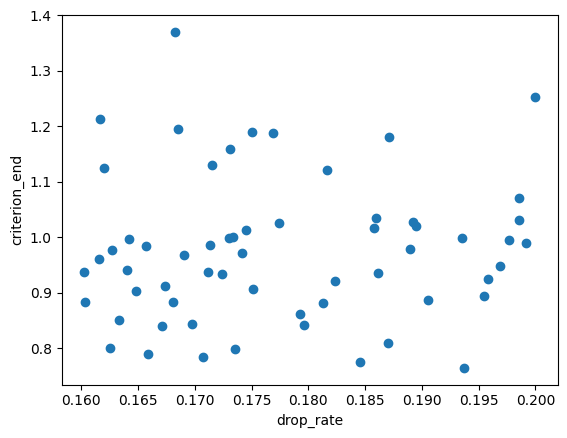

In [ ]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_3143291/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


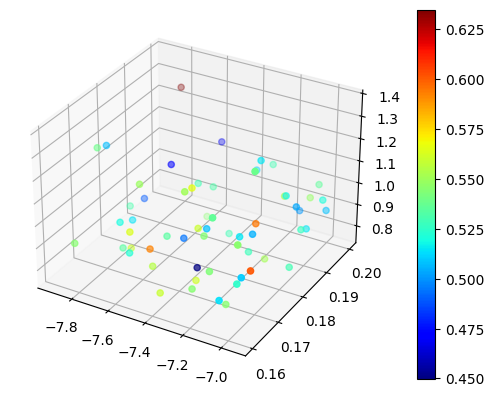

In [ ]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_3143291/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


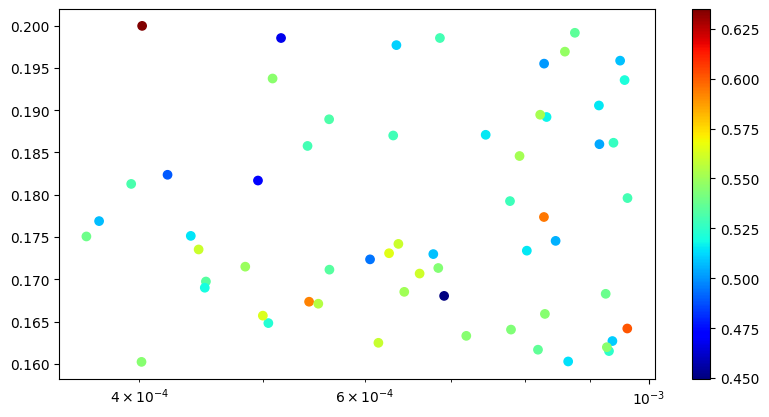

In [ ]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_3143291/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


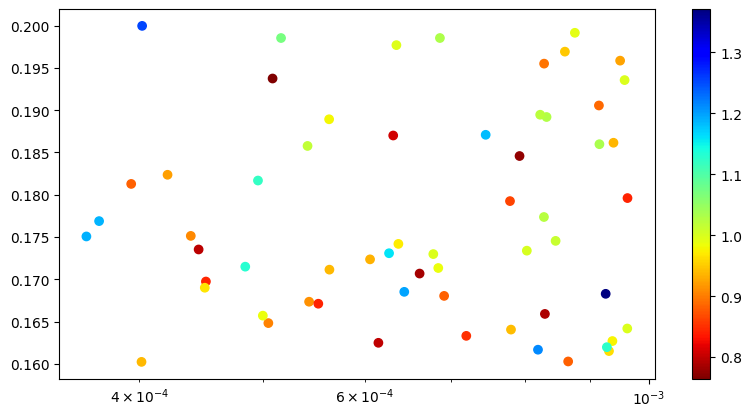

In [ ]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

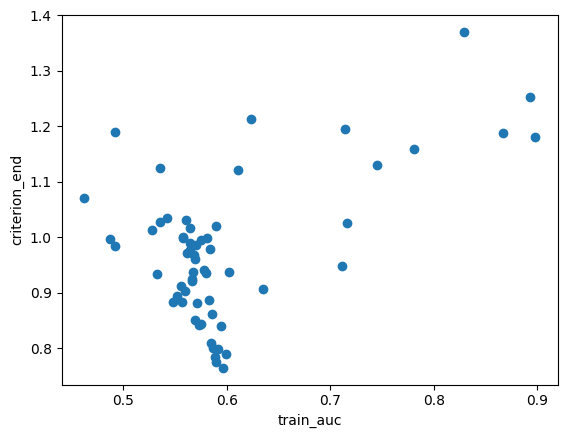

In [ ]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

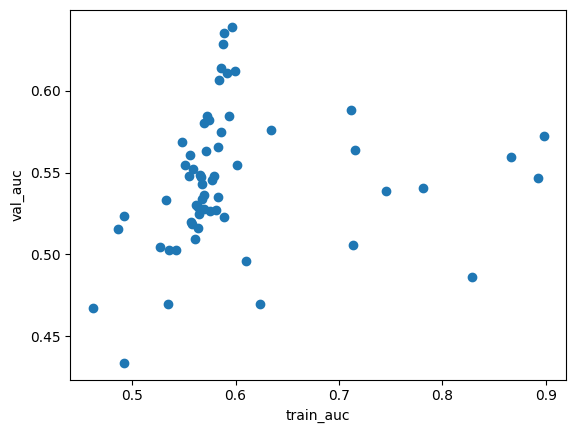

In [ ]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

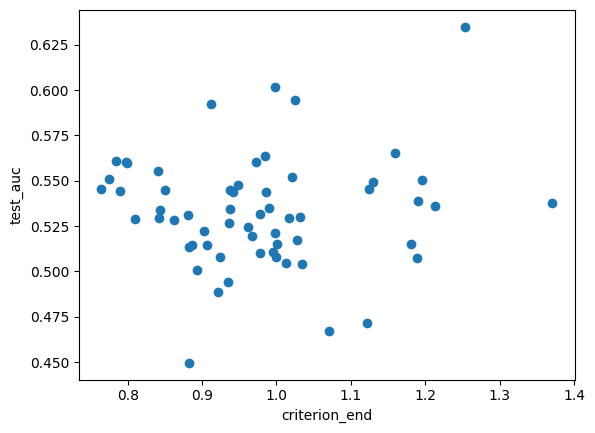

In [ ]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

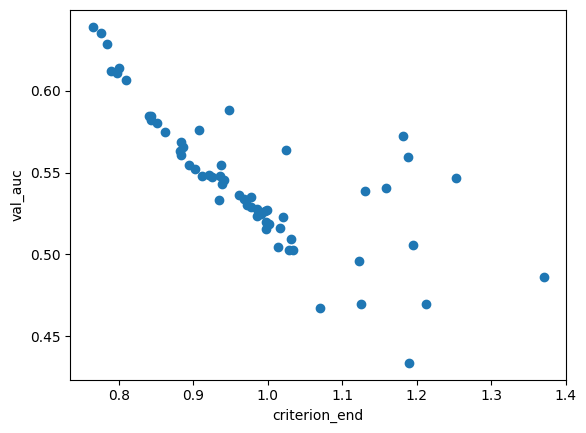

In [ ]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

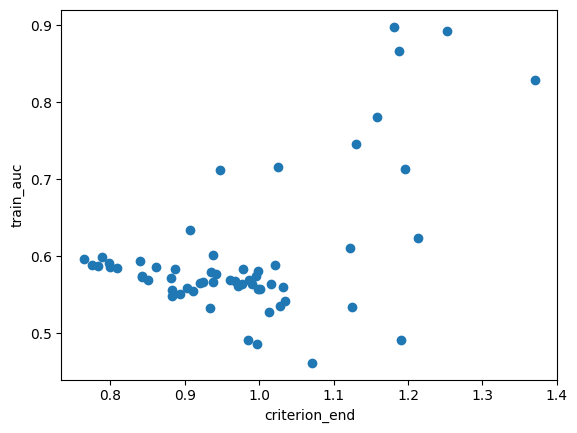

In [ ]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [ ]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,test_auc_random,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
31,/volatile2/jc225751/Runs/61_classifier_regress...,0.596473,0.638953,0.545743,0.601565,0.639935,0.550361,0.193741,0.706997,0.000508,0.417369,138.286911,0.495949,0.758500,0.764575,0.006075,-3.260503,-2.947323,-6.072823,-2.964904
55,/volatile2/jc225751/Runs/61_classifier_regress...,0.589306,0.635352,0.551227,0.582771,0.639607,0.560173,0.184576,0.900516,0.000792,0.388733,138.084366,0.502604,0.777622,0.775342,0.002280,-2.867585,-2.881591,-5.674471,-3.418205
18,/volatile2/jc225751/Runs/61_classifier_regress...,0.588120,0.628151,0.561039,0.580037,0.617676,0.561328,0.170678,0.867206,0.000662,0.273793,138.482391,0.509259,0.802287,0.783730,0.018557,-3.279715,-2.995112,-5.776807,-3.505327
58,/volatile2/jc225751/Runs/61_classifier_regress...,0.599087,0.611784,0.544589,0.607049,0.613748,0.552092,0.165904,0.853976,0.000829,0.155085,137.913651,0.509549,0.779203,0.789129,0.009926,-5.005798,-3.785506,-7.456280,-2.863845
50,/volatile2/jc225751/Runs/61_classifier_regress...,0.591815,0.610475,0.560173,0.594054,0.607529,0.559596,0.173526,0.840312,0.000445,0.305996,138.039276,0.519097,0.798418,0.797710,0.000708,-4.306927,-3.552275,-6.687784,-3.122345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,/volatile2/jc225751/Runs/61_classifier_regress...,0.491902,0.433879,0.538817,0.503072,0.597381,0.561183,0.175065,0.944032,0.000364,0.455986,138.732666,0.541377,0.899546,1.190266,0.290719,-2.361178,-2.687902,-4.637913,-3.059147
27,/volatile2/jc225751/Runs/61_classifier_regress...,0.713700,0.506056,0.550649,0.609167,0.617349,0.556421,0.168515,0.834852,0.000644,0.061354,133.071228,0.503472,0.773484,1.195533,0.422049,-4.805898,-1.524894,-7.299021,-2.827387
59,/volatile2/jc225751/Runs/61_classifier_regress...,0.623229,0.470049,0.535931,0.569408,0.536170,0.535642,0.161673,0.966733,0.000819,0.160544,136.984207,0.571181,0.960897,1.213082,0.252185,-3.404070,-1.812901,-5.212997,-3.942074
52,/volatile2/jc225751/Runs/61_classifier_regress...,0.892621,0.546645,0.634921,0.601010,0.581997,0.548629,0.199964,0.907358,0.000402,0.070018,122.142357,0.537326,0.855019,1.252686,0.397667,-3.962641,-1.032893,-6.099683,-2.975742


Text(0, 0.5, 'criterion_end')

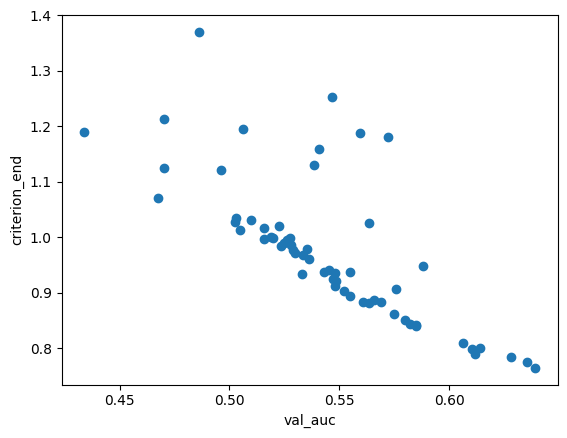

In [ ]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

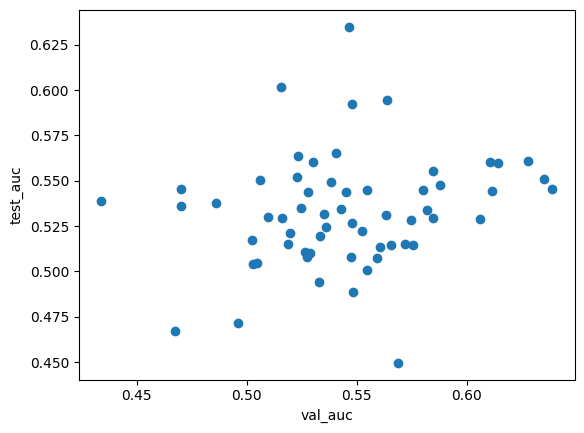

In [ ]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")